In [1]:
import numpy as np
import scanpy as sc
import h5py
import gdown
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the datasets

In [2]:
gdown.download(
    'https://drive.google.com/uc?id=1i5Yj7Hh6ZYn9MpJ5hikOqA-SvnYK4zvQ',
    'cao2018-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1i5Yj7Hh6ZYn9MpJ5hikOqA-SvnYK4zvQ
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/cao2018-expressions.h5ad
19.5MB [00:00, 37.0MB/s]


'cao2018-expressions.h5ad'

In [3]:
scrna = sc.read('cao2018-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 7362 × 4000
    obs: 'source', 'replicate', 'experiment', 'tsne_1', 'tsne_2', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_type', 'gene_short_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
gdown.download(
    'https://drive.google.com/uc?id=1BujbHCgZxjS2K7lxxQ1XXLQJ2lPDnpZN',
    'cao2018-peaks.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1BujbHCgZxjS2K7lxxQ1XXLQJ2lPDnpZN
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/cao2018-peaks.h5ad
34.2MB [00:00, 38.2MB/s]


'cao2018-peaks.h5ad'

In [5]:
scatac = sc.read_h5ad('cao2018-peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 7362 × 41524
    obs: 'replicate', 'cell_type', 'nb_features'
    var: 'chr', 'start', 'end', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [6]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [7]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [8]:
ent.set_data_matrix(
    [[scrna.X.A], [scatac.X.A]],
    views_names=['scRNA', 'scATAC'])

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='group0' with N=7362 samples and D=4000 features...
Successfully loaded view='scATAC' group='group0' with N=7362 samples and D=41524 features...





In [9]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = False, # one group
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scATAC): gaussian




In [10]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

In [11]:
ent.build()

In [12]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -406176503.11 

Iteration 1: time=533.70, ELBO=-32964883.86, deltaELBO=373211619.249 (91.88409876%), Factors=19
Iteration 2: time=482.23, ELBO=-32642185.55, deltaELBO=322698.308 (0.07944780%), Factors=18
Iteration 3: time=444.85, ELBO=-32544080.02, deltaELBO=98105.533 (0.02415342%), Factors=17
Iteration 4: time=436.73, ELBO=-32465851.50, deltaELBO=78228.519 (0.01925974%), Factors=16
Iteration 5: time=466.17, ELBO=-32397723.33, deltaELBO=68128.167 (0.01677304%), Factors=15
Iteration 6: time=402.54, ELBO=-32326709.23, deltaELBO=71014.103 (0.01748356%), Factors=14
Iteration 7: time=423.51, ELBO=-32259648.32, deltaELBO=67060.908 (0.01651029%), Factors=13
Iteration 8: time=377.60, ELBO=-32200241.88, deltaELBO=59406.441 (0.01462577%), Factors=12
Iteration 9: time=375.62, ELBO=-32143596.84, deltaELBO=56645.038 (0.01394592%), Factors=11
Iteration 10: time

In [13]:
outfile = 'cao2018-mofa2.hdf5'
ent.save(outfile)

Saving model in cao2018-mofa2.hdf5...


## Save as AnnData

In [14]:
f = h5py.File(outfile)

In [16]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

z.obs_names = scrna.obs_names
z.obs = scrna.obs

z

AnnData object with n_obs × n_vars = 7362 × 10
    obs: 'source', 'replicate', 'experiment', 'tsne_1', 'tsne_2', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'

In [17]:
z.write('../data/integrated/mofa/cao-mofa.h5ad')

## Remove old files

In [18]:
!rm 'cao2018-expressions.h5ad'
!rm 'cao2018-peaks.h5ad'
!rm 'cao2018-mofa2.hdf5'

## Visualize results

In [19]:
sc.pp.neighbors(z)
sc.tl.umap(z)

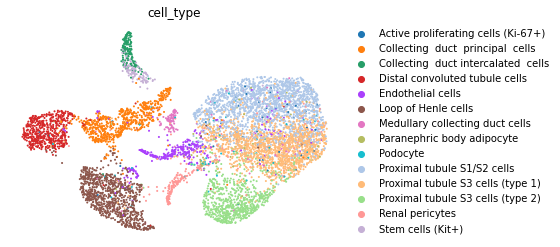

In [20]:
sc.pl.umap(z, color='cell_type', frameon=False)